# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [200]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [201]:
# 1. Missing Values (Numeric)
bnb = pd.read_csv('/Users/gracesaunders/Documents/GitHub/wrangling/assignment/data/airbnb_hw.csv')

In [202]:
"""
Cleaning the Price variable: removing commas and converting to numeric, then sorting to check that the high and low values look correct.
Remaining missing: 0
Cell generated by Data Wrangler. 
"""
def clean_data(df):
    df['Clean Price'] = df['Price'].str.replace(',', '') #remove commas from Price column
    df['Clean Price'] = pd.to_numeric(df['Clean Price']) #convert Price column to numeric
    df = df.sort_values(['Clean Price'], ascending=[False]) # Sort by column: 'Clean Price' (descending) 
    return df

bnb_clean = clean_data(bnb.copy())
bnb_clean.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Clean Price
23927,23248648,11/2/2014,NO LONGER BOOKING RESERVATIONS,Manhattan,Apartment,95.0,Entire home/apt,10025.0,2.0,1,21,"10,000",95.0,10000
4002,1177497,9/18/2011,Film Location,Brooklyn,House,NaN,Entire home/apt,11205.0,5.0,1,0,"8,000",NaN,8000
17900,11598359,1/24/2014,SUPER BOWL Brooklyn Duplex Apt!!,Brooklyn,Apartment,NaN,Entire home/apt,11238.0,4.0,1,0,"6,500",NaN,6500
2405,496780,4/9/2011,test listing which is not real,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,5.0,1,0,"5,999",NaN,5999
24136,23564279,11/10/2014,Breathtaking 2-Story Soho Penthouse,Manhattan,Apartment,NaN,Entire home/apt,10013.0,3.0,1,0,"5,000",NaN,5000


In [203]:
#2: Missing Data (Categorical)
mn = pd.read_csv('/Users/gracesaunders/Documents/GitHub/wrangling/assignment/data/mn_police_use_of_force.csv')

In [204]:
mn['injury_NA'] = mn['subject_injury'].isnull() # Create an injured missing dummy; 

print("# of missing values for injury: ", sum(mn['injury_NA']),'\n') # How many missing values are there?
print("percent of missing values for injury: ",sum(mn['injury_NA'])/len(mn['injury_NA'])*100,'\n') # What proportion of the data is missing?

pd.crosstab(mn['force_type_action'], mn['force_type']) # Create a crosstab of force_type and force_type_action to look at specifics 

# of missing values for injury:  9848 

percent of missing values for injury:  76.19342359767892 



force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
force_type_action,,,,,,,,,,,
Arcing,0,0,0,0,0,0,0,0,0,0,38
Bean Bag Round,0,0,0,0,0,0,87,3,0,0,0
Bicycle,0,0,0,0,0,8,0,0,0,0,0
Body Weight Pin,0,2651,0,0,0,0,0,0,0,0,0
Body Weight to Pin,0,1711,0,0,0,0,0,0,0,0,0
Chemical Munitions,0,0,25,0,0,0,0,0,0,0,0
Compliance,0,0,0,0,104,0,0,0,0,0,0
Conscious Neck Restraint,0,92,0,0,0,0,0,0,0,0,0
Crowd Control Mace,0,0,899,0,0,0,0,0,0,0,0


In [205]:

mn = mn.fillna({'subject_injury': "Unknown"}) # Fill missing values with "Unknown"
pd.crosstab(mn['subject_injury'], mn['force_type']) # Create a crosstab of subject_injury and force_type

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unknown,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


Observations from crosstab:

For incidents where force_type = Bodily Force, 7,051/9,430 rows are missing for subject_injured (this accounts for most of the missing data, since it's a very large majority of the largest category of force type)

It's difficult to conclude whether an injury resulted from all of these missing observations because 'Bodily Force' is such a broad range.

The second largest contributor to the missing data is force_type = Chemical Irritant (mostly mace), with 1,421 observations missing for subject_injured. 


Cleaning choices: 

Because so much critical information was missing from the data set, I chose to replace Missing values for subject_injured with 'Unknown,' because that seemed the most reflective of reality. 

It's tempting to 'fix' the data by guessing or assuming bassed on force_type, but I can't think of any 'objective' or 'accurate' way to do so. I don't think a boolean variable was an informative way to store information on injuries, because the difference between irritation from mace or tear gas is quite different from a dog bite or a 'maximal restraint technique.' For example, I found it particularly interesting that all observations for Maximal Restraint Technique were missing for subject_injured, considering that MRT was outlawed in MN after the murder of George Floyd. I wouldn't consider his injury status to be Unknown. 

However, with the given data structure, 'Unknown' seemed to be the most applicable, and I didn't feel that it was right to impute values based on my own guesses. 

In [206]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pt = pd.read_csv(url,low_memory=False) 

In [207]:
#3. Dummy variable: clean `WhetherDefendantWasReleasedPretrial` 
pt.head()
var = 'WhetherDefendantWasReleasedPretrial' # variable to be cleaned
null_count = sum(pt[var].isnull()) # count how many missing values there are
print ("# of missing values for", var, ":", null_count, '\n') # there are zero null values, but the code book indicates that 9 is 'Unclear'

pt[var] = pt[var].replace( [9], np.nan) # replacing the code for 'Unclear' with NaN

print(pt[var].value_counts(), '\n') # examine counts of each unique value


# of missing values for WhetherDefendantWasReleasedPretrial : 0 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 



Codebook on Sentence type

Probation/no incarceration  0 -> 0
Jail up to 12 months 1 
Prison (one year or more) 2 
Other, all charges in cohort contact resulted in pending, dismissed, deferred, etc.  4 -> 0
Not applicable (e.g., disposition record not found, or unknown) 9

In [208]:
# 4. Missing values, not at random: 
sl = 'ImposedSentenceAllChargeInContactEvent' # variable to be cleaned - Total Imposed Sentence (months)
st = 'SentenceTypeAllChargesAtConvictionInContactEvent' # related - Sentence Type

pt[sl] = pd.to_numeric(pt[sl], errors='coerce') # coerce to numeric

pt['sl_na'] = pt[sl].isnull() # Create a missing dummy for sentence length

print("How many missing values for sentence length?")
print(sum(pt['sl_na']),'\n')

print("Cross tab missing sentence length with sentence type: \n")
print(pd.crosstab(pt['sl_na'],pt[st]),'\n') # cross tab missing sentence length with sentence type
# Shows that all of the missing values for sentence length are for sentence type 'Other' or 'Not Applicable'
# Logically, if the sentence type is 'Other' or 'Not Applicable', 
# they received no incarceration time so there should be no sentence length (i.e., 0 months).

#Replacing missing values with 0 where sentence type logically implies no sentence length
pt.loc[ pt[st] == 4, sl] = 0 # Sentence type is 'Other'
pt.loc[ pt[st] == 9, sl] = 0 # Sentence type is 'Not Applicable'

print("How many missing values are left?")
print(sum(pt['sl_na']),'\n') 



How many missing values for sentence length?
9053 

Cross tab missing sentence length with sentence type: 

SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
sl_na                                                                       
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

How many missing values are left?
9053 



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.


In [209]:
sa = pd.read_excel('/Users/gracesaunders/Documents/GitHub/wrangling/data/GSAF5.xls')

2. Drop any columns that do not contain data.


In [210]:
sa = sa.drop(columns=['Unnamed: 22'])
sa = sa.drop(columns=['Unnamed: 21'])

sa.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,N,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Y,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?


In [211]:
# find range for Year column
print(sa['Year'].min(), "to ", sa['Year'].max())

0.0 to  2026.0


In [212]:
sa['Year'] = sa['Year'].replace(0, np.nan) # replacing zeroes with NaN
sa['Year'] = sa['Year'].replace(2026, 2024) # replace 2026 (future) with correct Year based on Date column

In [213]:
sa['Year'].describe()
# now min & max look at least a bit better than before. still some questionable values like 5 and 77, 
# but apparently those are correct according to the Date column.

count    6859.000000
mean     1971.384750
std        60.722703
min         5.000000
25%      1950.000000
50%      1987.000000
75%      2010.000000
max      2025.000000
Name: Year, dtype: float64

<Axes: >

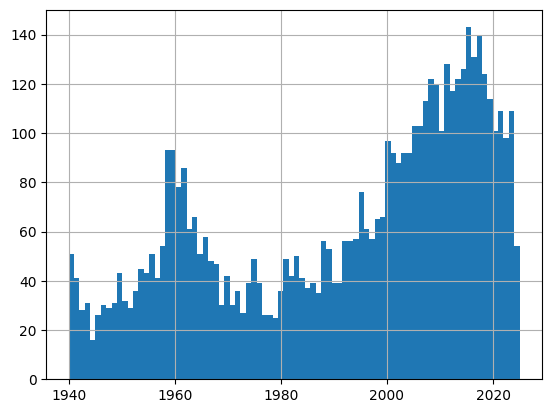

In [214]:
recent = sa[sa['Year'] >= 1940] # subset to only recent years
recent['Year'].hist(bins=(2024-1940)) # create histogram of recent years

# attacks spiked in 1960; since then, they were increasing overall until about 2015, then started to decrease.

4. Clean the Age variable and make a histogram of the ages of the victims.

<Axes: >

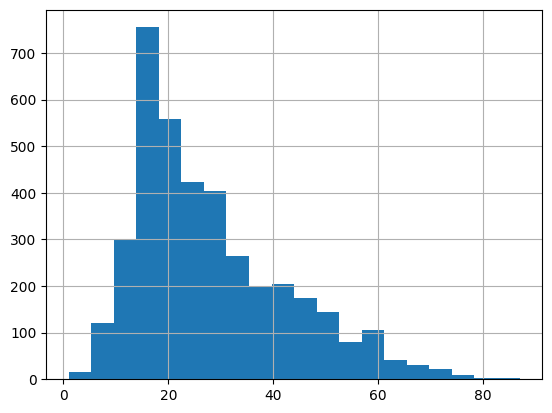

In [215]:
sa['Age'] = pd.to_numeric(sa['Age'], errors = 'coerce')
sa['Age'].describe()
sa['Age'].hist(bins=20) # create histogram for Age



5. What proportion of victims are male?


In [225]:
sa['Sex'].value_counts() # count of each unique option

Sex
M          5615
F           792
Unknown       4
Name: count, dtype: int64

In [224]:
sa['Sex'] = sa['Sex'].replace(["M x 2", "M ", " M"], "M")
sa['Sex'] = sa['Sex'].replace(["N", "lli", "."], "Unknown")
print("Proportion of male victims: ", 5615, " out of", (5615+792+4))
print("Percentage: ", 5615/(5615+792+4)*100, "%")


Proportion of male victims:  5615  out of 6411
Percentage:  87.58384027452816 %


6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?


In [217]:
sa['Type'].describe()
sa['Type'] = sa['Type'].replace(" Provoked", "Provoked")
sa['Type'] = sa['Type'].replace(["Invalid","Watercraft",
                                 "Sea Disaster","Questionable","Boat", "?", 
                                 "Unconfirmed", "Unverified", "Under investigation"], "Unknown")
sa['Type'].value_counts()

print("Proportion of unprovoked attacks: 5151 out of", (5151+1182+639))
print("Percentage: ", 5151/(5151+1182+639)*100, "%")


Proportion of unprovoked attacks: 5151 out of 6972
Percentage:  73.88123924268503 %


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.


In [218]:
sa['Fatal Y/N'].describe()
sa['Fatal Y/N'] = sa['Fatal Y/N'].replace(['F','M','Nq', 2017], "UNKNOWN")
sa['Fatal Y/N'] = sa['Fatal Y/N'].replace(['y', 'Y x 2'], "Y")
sa['Fatal Y/N'] = sa['Fatal Y/N'].replace(['n', ' N', 'N '], "N")
sa['Fatal Y/N'].value_counts()

Fatal Y/N
N          4879
Y          1470
UNKNOWN      80
Name: count, dtype: int64

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?


In [ ]:
ct = pd.crosstab(sa['Type'], sa['Sex'])
print(ct)

print("Unprovoked / All for Men: ", 4312, " out of", (4312+741+548)) 
print("Proportion: ", 4312/(4312+741+548)*100, "%")

print("Unprovoked / All for Women: ", 670, " out of", (31+87+670))
print("Proportion: ", 670/(31+87+670)*100, "%")

# by # of attacks, sharks are much more likely to attack men unprovoked (4312 instances) 
# than women (670), but they are also much more likely to attack men than women in general. 

# The proportion of unprovoked attacks / total for each sex is similar (around 80%), 
# but slightly higher for women (85%)

Sex           F     M  Unknown
Type                          
Provoked     31   548        1
Unknown      87   741        2
Unprovoked  670  4312        1
Unprovoked / All for Men:  4312  out of 5601
Proportion:  76.98625245491877 %
Unprovoked / All for Women:  670  out of 788
Proportion:  85.0253807106599 %


In [ ]:
ct2 = pd.crosstab(sa['Fatal Y/N'], sa['Type'])
print(ct2)
print("\n")

print("Fatal Y / All Provoked: ", 21, " out of", (21+5+609)) 
print("Proportion: ", 21/(21+5+609)*100, "%", "\n")

print("Fatal Y / All Unprovoked: ", 1252, " out of", (1252+61+3821))
print("Proportion: ", 1252/(1252+61+3821)*100, "%", "\n")

# chances of a fatal attack are much higher for unprovoked attacks, 24 % vs 3% for provoked attacks


Type       Provoked  Unknown  Unprovoked
Fatal Y/N                               
N               609      440        3821
UNKNOWN           5       13          61
Y                21      193        1252


Fatal Y / All Provoked:  21  out of 635
Proportion:  3.3070866141732282 % 

Fatal Y / All Unprovoked:  1252  out of 5134
Proportion:  24.386443319049476 % 



In [ ]:
ct3 = pd.crosstab(sa['Fatal Y/N'], sa['Sex'])
print(ct3)
print("\n")

print("Fatal Y / All Women: ", 120, " out of", (602+5+120)) 
print("Proportion: ", 120/(602+5+120)*100, "%", "\n")

print("Fatal Y / All Men: ", 1241, " out of", (1241+44+3915))
print("Proportion: ", 1241/(1241+44+3915)*100, "%", "\n")

# chances of a fatal attack are generally low, but higher for men than women.

# I still think sharks are just out there living their lives, and we're the ones 
# invading their territory most of the time. I think they're pretty cool, and since
# I'm not a man, I'm particularly less worried about getting attacked because apparently 
# my chances are way lower. 

Sex          F     M  Unknown
Fatal Y/N                    
N          602  3915        2
UNKNOWN      5    44        0
Y          120  1241        2


Fatal Y / All Women:  120  out of 727
Proportion:  16.506189821182943 % 

Fatal Y / All Men:  1241  out of 5200
Proportion:  23.865384615384617 % 



9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [251]:
white_sharks = sa[sa["Species "].str.contains("white shark", regex=False, na=False, case=False)]
white_sharks.head()
white_sharks["Species "].value_counts()
print(len(white_sharks), "attacks by white sharks")
print("Proportion of all attacks: ", len(white_sharks), " out of", len(sa))
print("Percentage: ", len(white_sharks)/len(sa)*100, "%")

700 attacks by white sharks
Proportion of all attacks:  700  out of 6990
Percentage:  10.014306151645208 %


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. "The 2020 Census used the required two separate questions (one for Hispanic or Latino origin and one for race) to collect the races and ethnicities of the U.S. population— following the standards set by the U.S. Office of Management and Budget (OMB) in 1997." [(US Census Bureau)](https://www.census.gov/programs-surveys/decennial-census/decade/2020/planning-management/release/faqs-race-ethnicity.html#:~:text=The%202020%20Census%20used%20the,Budget%20(OMB)%20in%201997.) This meant that respondents were asked first a Yes/No question about Hispanic/Latino origin followed by a multiple choice question featuring five racial categories and "Some Other Race." This year's census changed the data collection from the 2010 census to allow for more detailed responses. For the first time, all respondents were asked a follow up write-in question about their specific national origin, including those who chose "White" and "Black." [(US Census Bureau)](https://www.census.gov/newsroom/blogs/random-samplings/2021/08/improvements-to-2020-census-race-hispanic-origin-question-designs.html)

2. Census data is important because it determines allocation of federal funding and apportionment for representation in government. [(usa.gov)](https://www.usa.gov/census-data) The race and ethnicity data is used for specific aid programs, analysis of policy effects, and population statistics. Collecting this data matters in particular to social scientists because having more detailed information about population demographics allows for disaggregation and for more complex analysis of social inequity, policy outcomes, and intersectional issues. The census has been increasingly politicized in recent presidencies [(Union of Concerned Scientists)](https://www.ucsusa.org/resources/attacks-on-science/officials-interfered-2020-census), such as the unsuccessful attempt to add a citizenship question, and the plans for the 2030 census take this trend to unprecedented extremes [(TIME Magazine)](https://time.com/7209054/trump-republicans-2030-census-politics-citizenship/).  Data quality in general matters because of GIGO, and the census, as the "largest nonmilitary mobilization in the U.S.," is an application of this concept with particularly far-reaching effects [(PBS)](https://www.pbs.org/newshour/nation/some-census-takers-who-fudged-2020-data-didnt-get-fired-federal-report-says). 

3. Census categories have always reflected their times. Biden considered updating these standards, which I think is highly needed since our societal conception of identity has changed significantly in the past (almost) thirty years since the 1997 OMB standards, and a similar format has been used for over fifty years. Research has shown that about 2/3 of Hispanic Adults identify being Hispanic as part of their racial background and 37% of Latinos selected "some other race" instead of another government-defined racial category in the 2010 census. [(Pew Research Center)](https://www.pewresearch.org/short-reads/2015/06/15/is-being-hispanic-a-matter-of-race-ethnicity-or-both/). Therefore, the improvements to the race and ethnicity questions in accurately reflecting respondents' self-identifications are significantly limited under current OMB standards, particularly for the rapidly growing Hispanic population. The increase in detail and complexity of the existing framework is a positive step, but if the current administration does update the OMB data standards, I doubt that it will be in the same direction. Another limitation of 2020 current system was the categorization of MENA populations as "white," which is a significant misrepresentation of reality when considering the frequency of anti-Arab discrimination, but this was improved by the addition of a MENA category in the new 2024 OMB guidelines. [(US Census Bureau)](https://www.census.gov/newsroom/blogs/random-samplings/2024/04/updates-race-ethnicity-standards.html) 

4. "At the Census Bureau, the sex question wording very specifically intends to capture a person's biological sex and not gender. Ambiguity of these two concepts interferes with accurately and consistently measuring what we intend to measure--the sex composition of the population." [(US Census Bureau)](https://www.census.gov/topics/population/age-and-sex/about.html). I can understand the intentions behind that approach, and I doubt that it's likely to change anytime soon, but I think there are a lot of advocacy groups out there who would want to have the type of national cross-sectional data on gender identity that the census provides for other demographic groups. I don't see why the census couldn't implement a separate question to capture gender self-identification. It is true that census questions are not meant to make participants uncomfortable, and in the past have been revised to be less invasive, so I can understand the difficulties that would be associated with asking about potentially sensitive information like that, but as long as privacy measures continued to be used properly I think once society as a whole becomes more accepting of alternative gender identities the data could be beneficial. An additional future improvement for the census would be the recognition of intersex people, who make up 1.7% of the population [(United Nations OHCHR)](https://www.ohchr.org/en/sexual-orientation-and-gender-identity/intersex-people) but are currently not reflected by the binary approach of the census question. 

5. As we discussed in class, missing data can produce misleading results. Census data is used for important analysis like employer compliance with civil rights laws. Missing data can conceal or exacerbate inequities. In the 2020 census, largely due to Trump administration policies and an order to cut field operations short, there was a 3-5% undercount of Black, Hispanic, Native American, and "some other race" populations, next to a 2-3% overcount of non-Hispanic white and Asian populations widening the gap. These millions of instances of missing data have significant consequences for the apportionment of representation and allocation of funding for people in these communities. [(AP)](https://apnews.com/article/us-census-bureau-hispanics-census-2020-d284cdbe32fd9ad1a1ad3794cd4d0362)For that reason, I understand imputation could be tempting, to attempt to represent all the missing people. However, protected characteristics are not rigid or unambiguous categories, so while I understand the desire for clean data, I don't think that's the motive here and I don't think imputation is a good idea. According to the National Research Council, the imputation methods used in the 2000 census were found to be low in overall impact, but to have disproportionately affected renters and ethnic minorities [(Pew Research Center)](https://www.pewresearch.org/social-trends/2011/05/04/imputation-adding-people-to-the-census/). 

6. Officials appointed by the previous Trump adminstration already "expressed interest" in the use of both item and status/count imputation in the 2020 Census, which Census Bureau senior experts noted with extreme concern amidst other attempts at pressuring census officials [(Documents obtained through an FOIA lawsuit)](https://www.brennancenter.org/sites/default/files/2022-01/BC-DOC-CEN-2020-1602-1445-1447.pdf). Additionally, already in the 2020 census, a 276% increase in the multiracial population and a 10 point drop in the percentage share of the white-only population caused alarm to conservatives, but was called "survey malpractice" by Princeton sociologists who say that the boom was mostly an illusion caused by the change in survey methods and the computerized algorithm that reclassified people as multiracial even if they only selected a single race because of the ambiguity of separating Hispanic ethnicity from race/national origin. [(AP)](https://apnews.com/article/2020-census-bureau-race-ethnicity-91376f5a672b698e4875fbee952aac46). So an algorithm for imputation of protected characteristics being implemented in the next census seems quite possible. 